# 0.Load Data

## 0.1 Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0.2 Read Data

In [41]:
df=pd.read_csv('/kaggle/input/retail-store-inventory-and-demand-forecasting/sales_data.csv')
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


# 1.Explore Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [43]:
df.shape

(76000, 16)

## 1.1 Find Null Values

In [44]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

In [45]:
colours=['#3A345B','#F3C8DD','#D183A9','#71557A','#4B1535']

# Sales Trend Analysis

## *Analyze how sales (Units Sold) vary across regions, product categories, and seasons.*

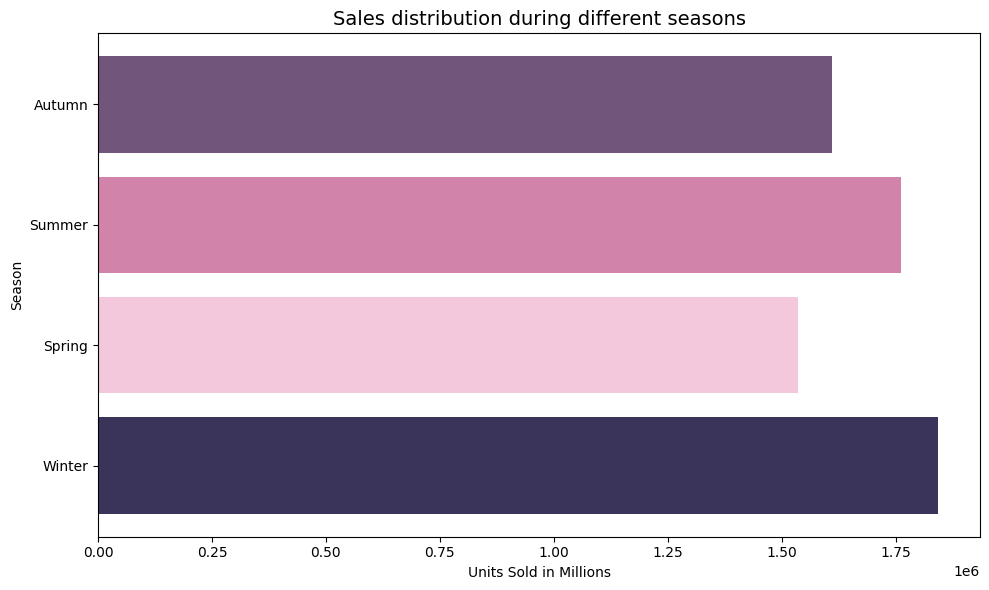

In [46]:
sales_by_seasons=df.groupby('Seasonality')['Units Sold'].sum()
seasons=['Winter', 'Spring', 'Summer', 'Autumn']
sales_by_seasons=sales_by_seasons.reindex(seasons)

ys=[i+1 for i,_ in enumerate(seasons)]

plt.figure(figsize=(10, 6))
plt.yticks(ys, sales_by_seasons.index)
plt.xlabel('Units Sold in Millions')
plt.ylabel('Season')
plt.title('Sales distribution during different seasons',fontsize=14)
# plt.legend()
plt.barh(ys,sales_by_seasons.values,color=colours)
plt.tight_layout()
plt.show()

##### From the above graph we can conclude that sales are at peak during winter season while there is relatively low demand for product in the Spring

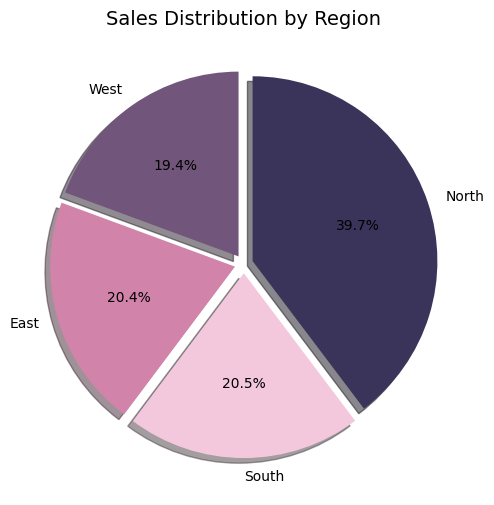

In [47]:
sales_across_regions=df.groupby('Region')['Units Sold'].sum().sort_values()
sorted_sales = sales_across_regions.sort_values(ascending=False)
sorted_colours = [colours[sales_across_regions.index.get_loc(idx)] for idx in sorted_sales.index]
plt.figure(figsize=(10,6))
plt.pie(sales_across_regions.values,
        labels=sales_across_regions.index,
        startangle = 90,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.05]*len(sales_across_regions),
        colors=sorted_colours)
plt.title('Sales Distribution by Region', fontsize=14)
plt.show()

##### North region has most sales while West region has least sales

Category
Clothing       1150873
Electronics     757335
Furniture       880654
Groceries      3127335
Toys            834679
Name: Units Sold, dtype: int64


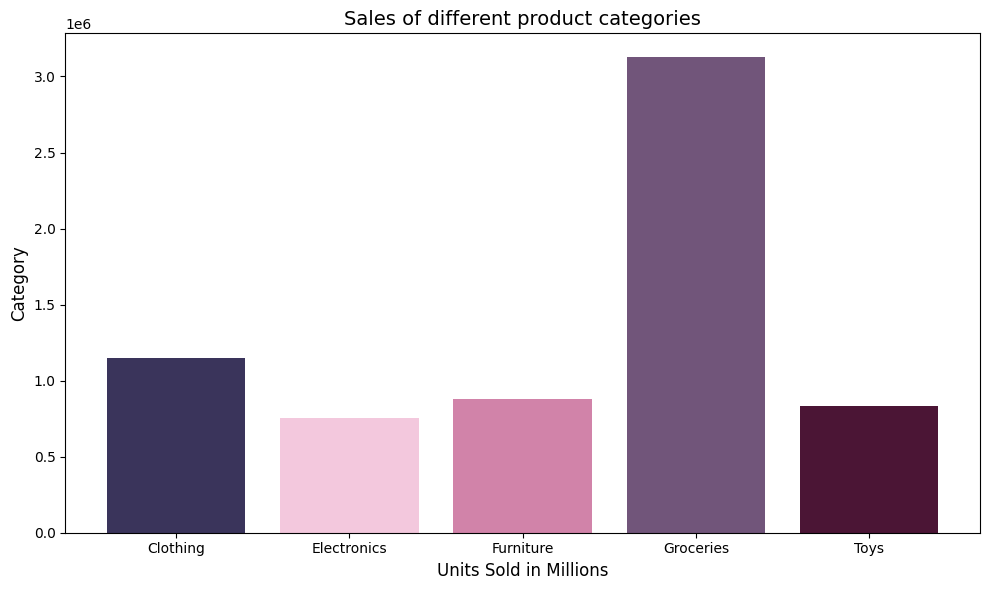

In [48]:
sales_by_category=df.groupby('Category')['Units Sold'].sum()
categories=['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture']
print(sales_by_category)
xs=[i+1 for i,_ in enumerate(categories)]

plt.figure(figsize=(10, 6))
plt.xticks(xs, sales_by_category.index)
plt.xlabel('Units Sold in Millions',fontsize=12)
plt.ylabel('Category',fontsize=12)
plt.title('Sales of different product categories',fontsize=14)
plt.bar(xs,sales_by_category.values,color=colours)
plt.tight_layout()
plt.show()

In [49]:
df['Promotion'].unique()

array([0, 1])

In [50]:
df['Category'].unique()

array(['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture'],
      dtype=object)

# Impact of Promotions on Sales

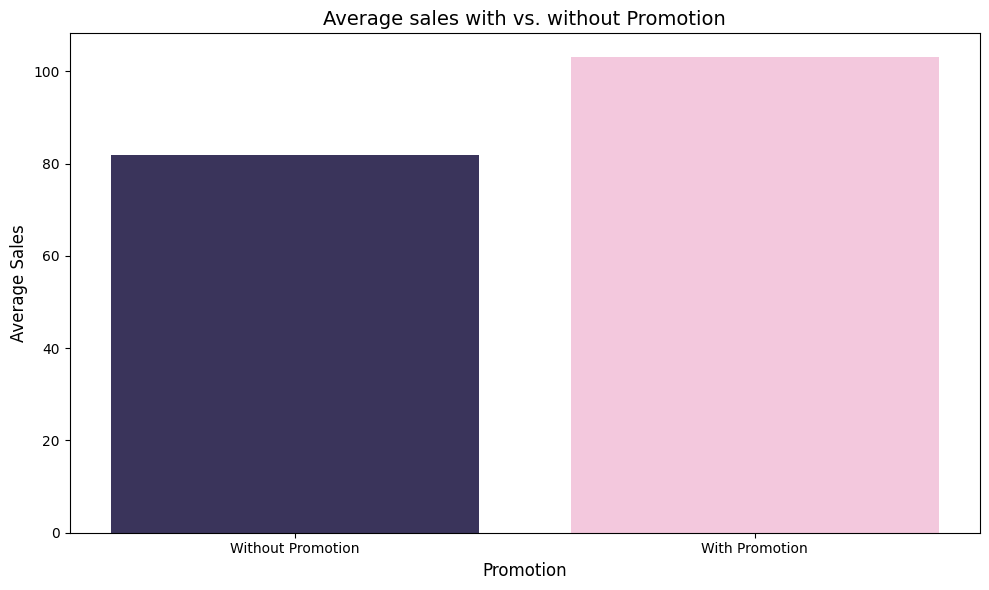

In [51]:
sales=df.groupby('Promotion')['Units Sold'].mean()
promotion=['Without Promotion','With Promotion']

xs=[i+1 for i,_ in enumerate(promotion)]
plt.figure(figsize=(10, 6))
plt.xticks(xs, [i for i in promotion])
plt.xlabel('Promotion',fontsize=12)
plt.ylabel('Average Sales',fontsize=12)
plt.title('Average sales with vs. without Promotion',fontsize=14)
plt.bar(xs,sales.values,color=colours)
plt.tight_layout()
plt.show()

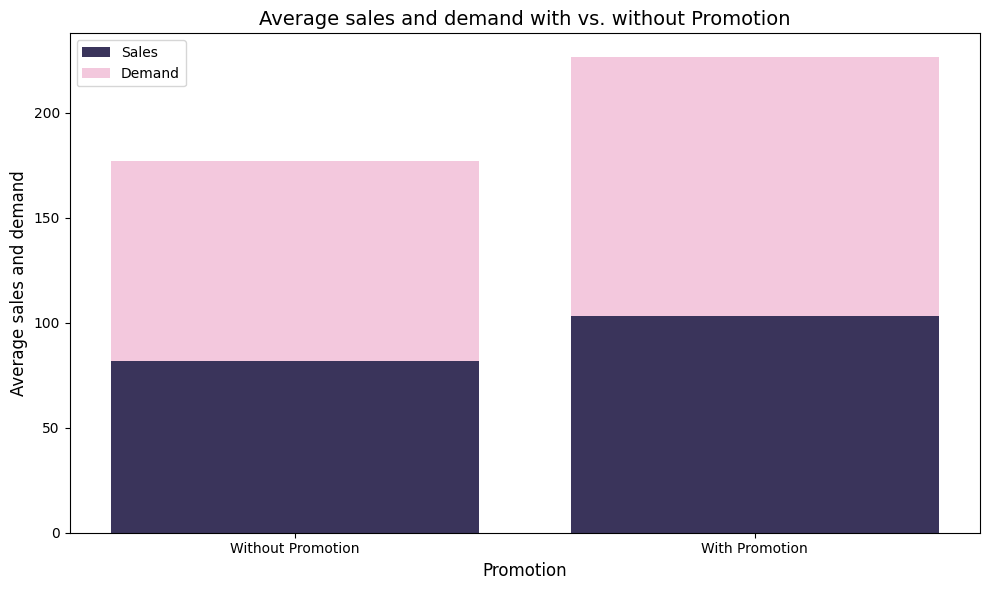

In [52]:
sales=df.groupby('Promotion')['Units Sold'].mean()
demand=df.groupby('Promotion')['Demand'].mean()
xs=[i+1 for i,_ in enumerate(promotion)]
plt.figure(figsize=(10, 6))
plt.xticks(xs, [i for i in promotion])
plt.xlabel('Promotion',fontsize=12)
plt.ylabel('Average sales and demand',fontsize=12)
plt.title('Average sales and demand with vs. without Promotion',fontsize=14)
plt.bar(xs,sales.values,color=colours[0])
plt.bar(xs,demand.values,bottom=sales.values,color=colours[1])
plt.legend(['Sales','Demand'])
plt.tight_layout()
plt.show()

Both demand and sales have shown surge due to promotional activities

# Discount Effectiveness

In [53]:
df['Discount'].unique()

array([ 5, 15, 10,  0, 25, 20])

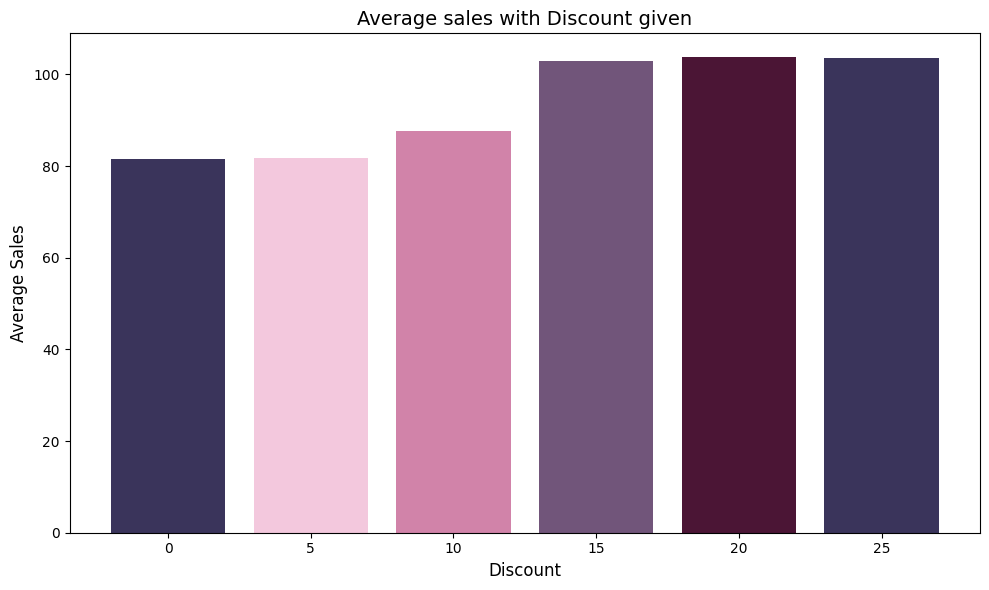

In [54]:
sales_by_discount=df.groupby('Discount')['Units Sold'].mean()
discounts=np.sort(df['Discount'].unique())
xs=[i+1 for i,_ in enumerate(discounts)]
plt.figure(figsize=(10, 6))
plt.xticks(xs, [i for i in discounts])
plt.xlabel('Discount',fontsize=12)
plt.ylabel('Average Sales',fontsize=12)
plt.title('Average sales with Discount given',fontsize=14)
plt.bar(xs,sales_by_discount.values,color=colours)
plt.tight_layout()
plt.show()

# Weather vs. Sales

## The relationship between Weather Conditions and Product Sales

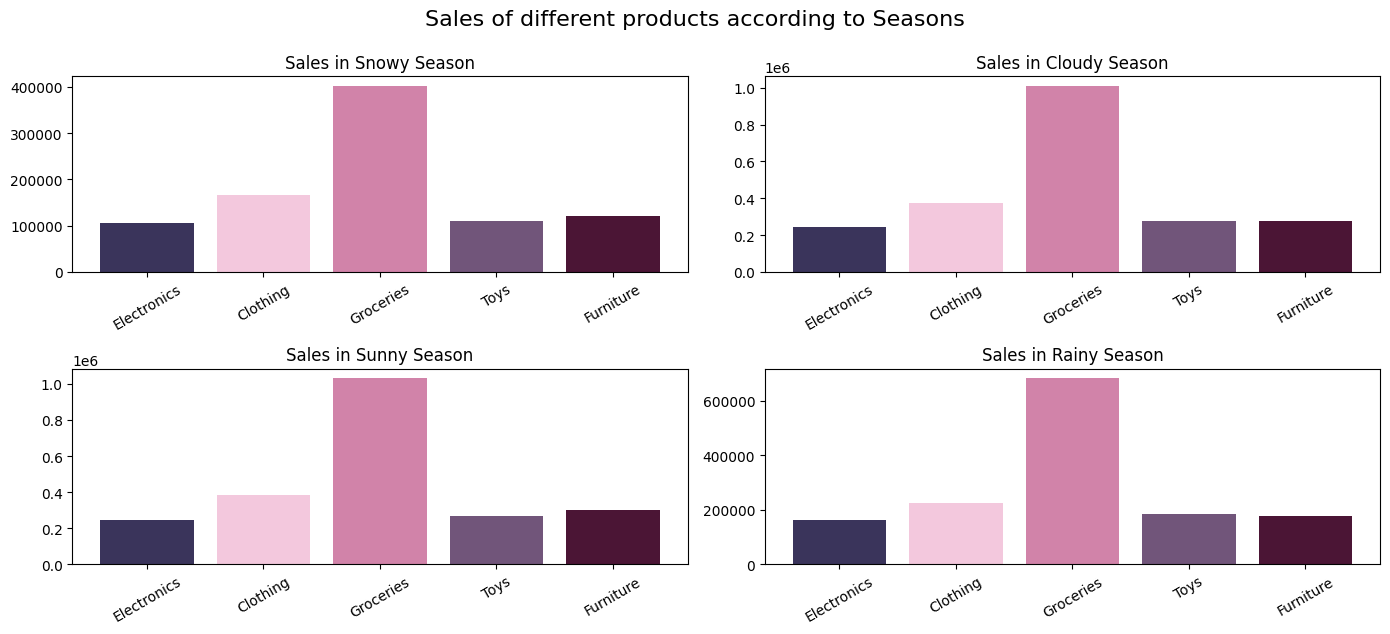

In [55]:
sales_by_category=df.groupby('Category')['Units Sold'].sum()
categories=['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture']
seasons=df['Weather Condition'].unique()
xs=[i+1 for i,_ in enumerate(categories)]

fig,axes=plt.subplots(2,2,figsize=(14, 6))
axes=axes.flatten()
for ax,season in zip(axes,seasons):
    sales_by_category=(df[df['Weather Condition']==season]
            .groupby('Category')['Units Sold'].sum().reindex(categories, fill_value=0))
    ax.bar(xs,sales_by_category.values,color=colours)
    ax.set_xticks(xs)
    ax.set_title(f"Sales in "+season+" Season")
    ax.set_xticklabels(categories, rotation=30)
    
plt.tight_layout()
plt.suptitle('Sales of different products according to Seasons',y=1.05,fontsize=16)
plt.show()

In Cloudy and Sunny Seasons the demand for products is huge while the demand of groceries remains high compared to other products in all the seasons

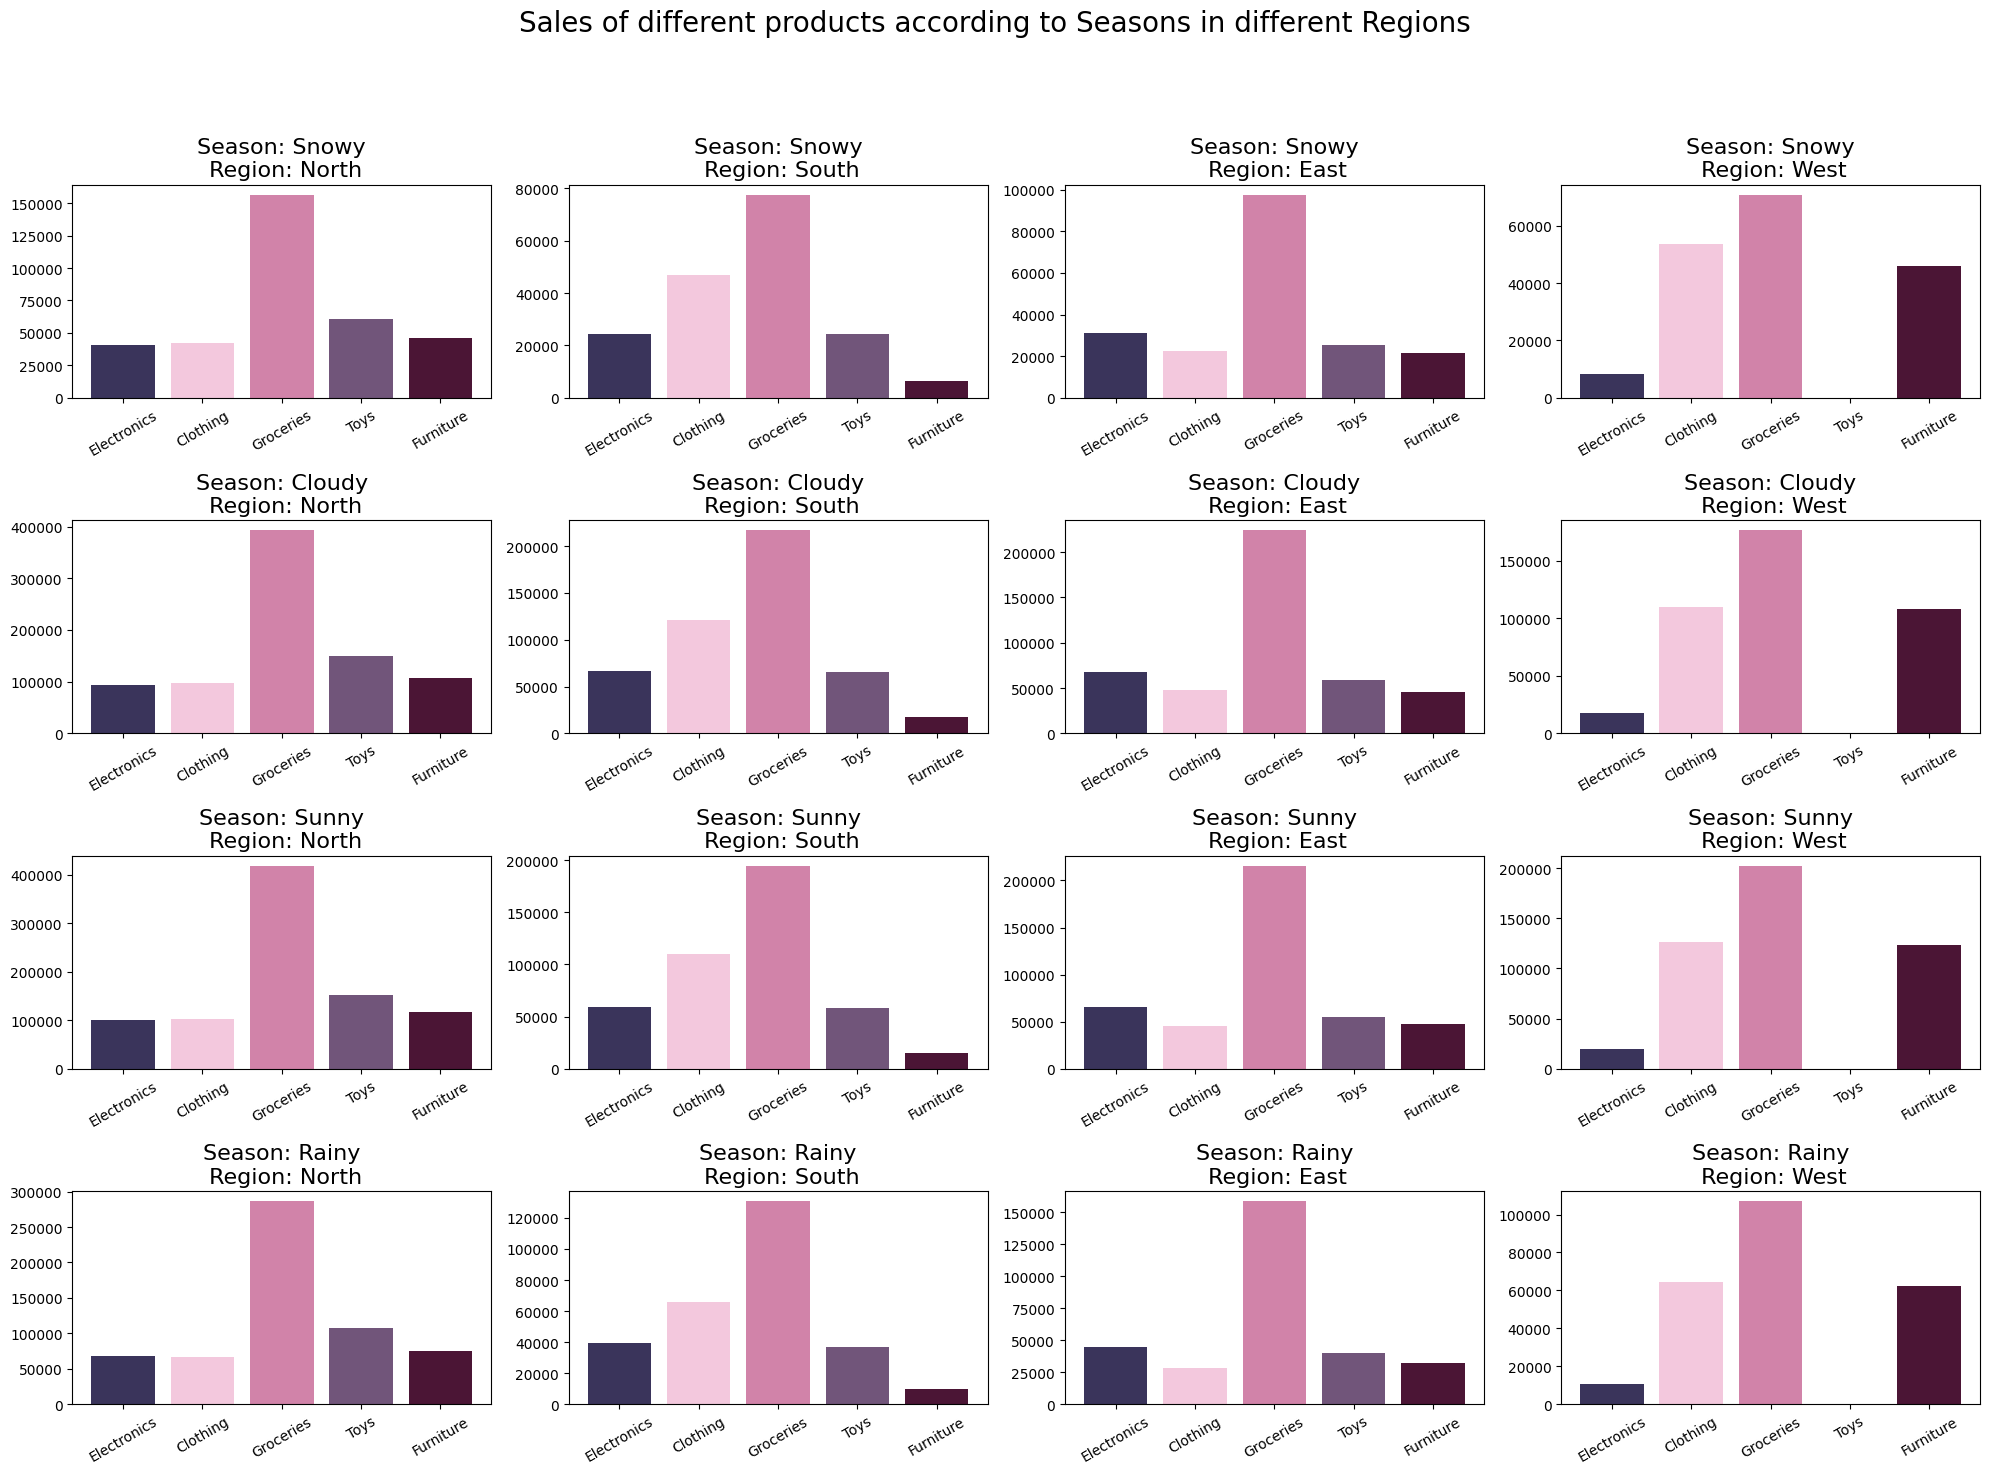

In [56]:
categories=['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture']
seasons=df['Weather Condition'].unique()
regions=df['Region'].unique()
xs=[i+1 for i,_ in enumerate(categories)]

fig,axes=plt.subplots(4,4,figsize=(20, 14))
axes=axes.flatten()
i=0
for ax,season in zip(axes,seasons):
    for region in regions:
        sales_by_category=(df[(df['Weather Condition']==season) & (df['Region']==region)]
            .groupby('Category')['Units Sold'].sum().reindex(categories, fill_value=0))
        ax=axes[i]
        ax.bar(xs,sales_by_category.values,color=colours)
        ax.set_xticks(xs)
        ax.set_title(f"Season: "+season+"\n Region: "+region,fontsize=16)
        ax.set_xticklabels(categories, rotation=30)
        i+=1
        
plt.suptitle('Sales of different products according to Seasons in different Regions',y=1.05,fontsize=20)
plt.tight_layout()
plt.show()

## **Sales according to Regions**

**The North**
   1. The sales in North region are high compared to other regions
   2. Sales in Sunny and Cloudy Season are maximum while Sales in Snowy Season are minimum
   3. 2nd most demanded product category is Toys category

**The South**
   1. Sales in Sunny and Cloudy Season are maximum while Sales in Snowy Season are minimum
   2. Furniture Sales in The South is significantly low
   3. 2nd most demanded product category is Clothing category

**The East**
   1. Sales in Sunny and Cloudy Season are maximum while Sales in Snowy Season are minimum
   2. 2nd most demanded product category is Electronic category

**The West**
   1. The sales in West region are low compared to other regions
   2. Sales in Sunny Season are maximum while Sales in Snowy Season are minimum
   3. Toys sales in West region is negligible
   4. 2nd most demanded product category is Clothing category

From the above diagrams we can see that Groceries are the most in demand regardless of season and region. The Sales in East and South regions are almost same. Sales are highest in North region while lowest in South region.
 